# WorkSpace

- https://www.pymc.io/projects/examples/en/latest/case_studies/reinforcement_learning.html
- https://hannekedenouden.ruhosting.nl/RLtutorial/html/ModellingRecipe.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

# Optimise the Action Space Directly

What if instead of optimising the negative log likelihood, we optimise the action space directly?

To do this we can minimize the `Sum of Square Residiuals` (`SSR`):

$$
SSR = \frac{1}{N} \sum_{n=1}^N \left(y-\hat{y} \right)^2
$$

But in an RL context:


$$
SSR = \frac{1}{N} \sum_{n=1}^N \left(Q-\hat{Q} \right)^2
$$

Noting that we do not have access to $\hat{Q}$ directly, rather we infer $Q$ from the action space:

$$
SSR = \frac{1}{N} \sum_{n=1}^N \left(A-\hat{A} \right)^2
$$


We then update $\hat{Q}$ as a function of the parameter space $\theta: \{\alpha, \theta\}$. 

### Learning Algorithm

Where $A:Action$. We therefor:

- Using parameters $\{\alpha, \theta\}$
- Calculate the probability space $\hat{P}$
- Calculate the state value estimate $\hat{Q}$
- Calculate the action space $\hat{A}$




Therefore we locate:


$$
\argmin_{\alpha, \theta} \frac{1}{N} \sum_{n=1}^N \left(A-\hat{A}(\hat{Q}, \hat{P}, \alpha, \theta) \right)^2
$$

### Simulation

To test the viability of this method, we perform a sensitivity analysis and assess the methods ability to recover simulated parameters.


In [1]:
import plotly.graph_objects as go
from scipy.optimize import minimize # finding optimal params in models
from scipy import stats             # statistical tools
import numpy as np                  # matrix/array functions
import pandas as pd                 # loading and manipulating data
import ipywidgets as widgets        # interactive display
import matplotlib.pyplot as plt     # plotting
%matplotlib inline

np.random.seed(2021)                # set seed for reproducibility

In [2]:
from src.rescorla_wagner_model import (RoscorlaWagner)
from src.rescorla_wagner_model_plots import (RescorlaWagnerPlots)
from src.rescorla_wagner_model_simulation import (RescorlaWagnerSimulate)
from src.rescorla_wagner_model_diagnostics import (RoscorlaWagerModelDiagnostics)

In [3]:
    """

    Optimise the action space directly.

    Optimise the Action Space Directly.

    Explanation:
        What if instead of optimising the negative log likelihood, we optimise the action space directly?

        To do this we can minimize the `Sum of Square Residiuals` (`SSR`):

        $$SSR = \frac{1}{N} \sum_{n=1}^N \left(y-\hat{y} \right)^2$$

        But in an RL context:

        $$SSR = \frac{1}{N} \sum_{n=1}^N \left(Q-\hat{Q} \right)^2$$

        Noting that we do not have access to $\hat{Q}$ directly, but rather we update $\hat{Q}$ as a function of the parameter space $\theta: \{\alpha, \theta\}$. 

        Therefore we locate:

        $$\argmin_{\alpha, \theta} \frac{1}{N} \sum_{n=1}^N \left(Q-\hat{Q}(\alpha, \theta) \right)^2$$

    
    Parameters:
    -----------
        : model_parameters (list[float]) : list of model parameters (alpha, theta)
            : alpha (float) : learning rate
            : theta (float) : inverse temperature
        : actions (array) : choices
        : rewards (array) : rewards

    Returns:
    --------
        : negLL (float) : negative log-likelihood

    Source:
    -------
        : https://shawnrhoads.github.io/gu-psyc-347/module-03-01_Models-of-Learning.html
    """

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/kd/p1z7_f_974d7tkw1zmvskn_m0000gn/T/ipykernel_10304/4234314411.py:1: SyntaxWarning: invalid escape sequence '\s'
  """


'\n\nOptimise the action space directly.\n\nOptimise the Action Space Directly.\n\nExplanation:\n    What if instead of optimising the negative log likelihood, we optimise the action space directly?\n\n    To do this we can minimize the `Sum of Square Residiuals` (`SSR`):\n\n    $$SSR = \x0crac{1}{N} \\sum_{n=1}^N \\left(y-\\hat{y} \right)^2$$\n\n    But in an RL context:\n\n    $$SSR = \x0crac{1}{N} \\sum_{n=1}^N \\left(Q-\\hat{Q} \right)^2$$\n\n    Noting that we do not have access to $\\hat{Q}$ directly, but rather we update $\\hat{Q}$ as a function of the parameter space $\theta: \\{\x07lpha, \theta\\}$. \n\n    Therefore we locate:\n\n    $$\x07rgmin_{\x07lpha, \theta} \x0crac{1}{N} \\sum_{n=1}^N \\left(Q-\\hat{Q}(\x07lpha, \theta) \right)^2$$\n\n\nParameters:\n-----------\n    : model_parameters (list[float]) : list of model parameters (alpha, theta)\n        : alpha (float) : learning rate\n        : theta (float) : inverse temperature\n    : actions (array) : choices\n    : rew

In [4]:
# @staticmethod
def direct_optimisation(model_parameters, actions, Q_init=[0.5, 0.5], noisy_choice=False):
    """

    Params:
    -------
        : actions list[bool]: [0,1]
        : Q_init list[int]: inital Q-values (bias).

    """

    # extract params
    alpha, theta = model_parameters

    # predict actions
    T = len(actions)
    choiceProb = np.zeros((T), dtype=float)
    action_pred = []

    # assuming action space K = 2

    for t in range(T):
            
        # compute choice probabilities for k=2
        p0 = np.exp(theta*Q[0]) / (np.exp(theta*Q[0]) + np.exp(theta*Q[1]))
        p = [p0, 1-p0]

        # compute choice probability for actual choice
        choiceProb[t] = p[actions[t]]

        # predict action
        if noisy_choice:
            # random variability
            if np.random.random_sample(1) < p0:
                _action = 0
            else:
                _action = 1

        else:
            # (deterministic)
            _action = np.argmax(p)
        action_pred.append(_action)

        # update Q-values
        delta = rewards[t] - Q[actions[t]]
        Q[actions[t]] = Q[actions[t]] + alpha * delta



        






In [5]:
# simulate results given params
rws = RescorlaWagnerSimulate()
params = [.2, 3]
actions = [0,1,1,1,0]

T = len(actions)
# c, r, Q_stored = rws.simulate()

In [68]:
def simulate_action_space(params, reward_vector, Q_init=None, noisy_choice=False):

        alpha, theta = params
        

        T = len(reward_vector)
        action_pred = np.zeros((T), dtype=int)

        Q_hat = np.zeros((2, T), dtype=float)
        if Q_init is None:
            Q_init = [0.5, 0.5]
        Q = Q_init
    

        for t in range(T):

            # store values for Q_{t+1}
            Q_hat[:, t] = Q
            
            # compute choice probabilities
            p0 = np.exp(theta*Q[0]) / (np.exp(theta*Q[0]) + np.exp(theta*Q[1]))
            p1 = 1 - p0

            # make choice according to choice probababilities
            # as weighted coin flip to make a choice
            # choose stim 0 if random number is in the [0 p0] interval
            # and 1 otherwise
            if noisy_choice:
                raise Exception('CANNOT BE NOISY.')
                # if np.random.random_sample(1) < p0:
                #     action_pred[t] = 0
                # else:
                #     action_pred[t] = 1
            else:
                # make choice without noise
                action_pred[t] = np.argmax([p0, p1])
            
            # fetch actual reward
            r = reward_vector[t]

            # update values
            delta = r - Q[action_pred[t]]
            Q[action_pred[t]] = Q[action_pred[t]] + alpha * delta

        return Q_hat, action_pred

Q_hat (init)  [0.5 0.5]


In [73]:
def binary_cross_entropy(y_true, y_pred):
    """
    Compute the binary cross-entropy loss.

    Parameters:
    -----------
    y_true : array-like of shape (n_samples,)
        True binary labels (0 or 1).
    y_pred : array-like of shape (n_samples,)
        Predicted probabilities for the positive class (1).

    Returns:
    --------
    float
        Binary cross-entropy loss.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Clip predictions to avoid log(0) error
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    
    # Compute binary cross-entropy
    bce = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return bce


In [1]:
def MSE(action, action_pred):
    return np.mean((action - action_pred)**2)


def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))



def loss_function(
        parameters,
        actions,
        Q_init=[0.5,0.5],
        ):
        _alpha, _theta = parameters
        Q_hat, action_pred = simulate_action_space([_alpha, _theta], actions, Q_init=Q_init, noisy_choice=False)
        mse = MSE(actions, action_pred)
        # bce = binary_cross_entropy(actions, action_pred)

        return mse
            


In [2]:
# simualate
# params
params = [0.2,4]
srw = RescorlaWagnerSimulate()
srw.simulate(params, T=200, mu=[0.2, 0.8], noisy_choice=True)
# srw.simulate(params, T=200, mu=[0, 1], noisy_choice=True)


# estimate
actions = srw.c
reward_vector = srw.r
Q_hat, action_pred = simulate_action_space(params, reward_vector)
# Q_hat, action_pred


MSE_results = []
Choice_prediction = []
alpha_range=np.linspace(0,1,10)
theta_range=np.linspace(1,10,10)
_alphas, _thetas = [], []

Q_init=[0.5,0.5]
T = len(actions)
for _alpha in alpha_range:
    for _theta in theta_range:
        _mse = loss_function([_alpha, _theta], actions, Q_init=Q_init)
        # print(f'alpha: {round(_alpha, 2)}, theta: {round(_theta, 2)}, mse: {mse}')
        MSE_results.append(_mse)
        _alphas.append(_alpha)
        _thetas.append(_theta)
        


    
        # if _mse <= min_mse:
        #     min_mse = _mse
        #     parameter_estimates = (_alpha, _theta)
            # Q_hat = _Q_hat
            # print('-> new parameter estimate!')




# import plotly.express as px
# px.line(x=alpha_range, y=MSE_results)

# create scatter matrix
# get parameters
idx = np.argmax(MSE_results)
ALPHA, BETA = _alphas[idx], _thetas[idx]
print(ALPHA, BETA)

NameError: name 'RescorlaWagnerSimulate' is not defined

In [78]:
Q_hat[0][:3],Q_hat[1][:3],
Q_hat[0].shape
Q_hat[:,0]

array([0.19788417, 0.74920599])

In [94]:
np.mean(action_pred==srw.c)

MSE(srw.c, action_pred)
(srw.c, action_pred)


(array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0,

Q_hat (init)  [0.5 0.5]


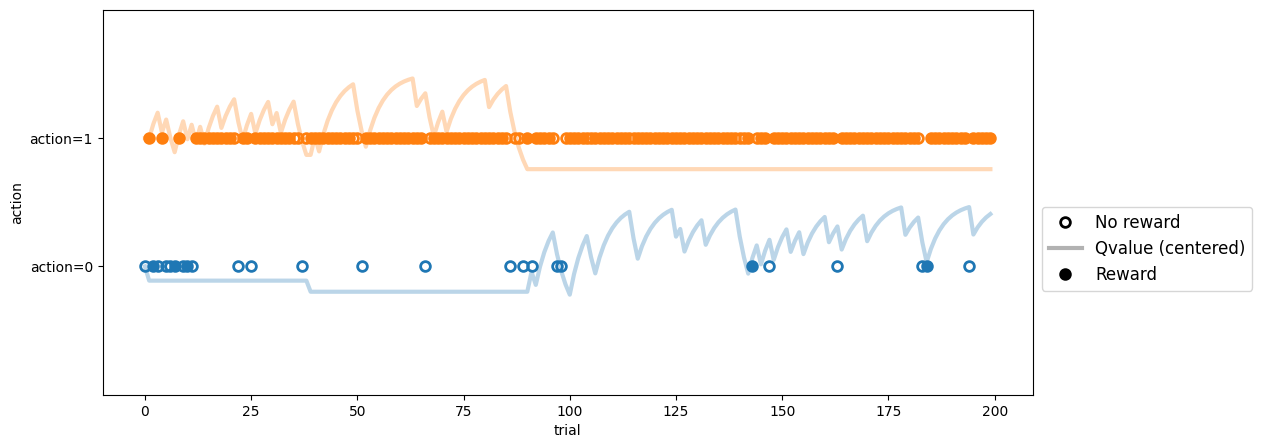

<module 'matplotlib.pyplot' from '/Users/zachwolpe/miniforge3/envs/mlxgo/lib/python3.12/site-packages/matplotlib/pyplot.py'>

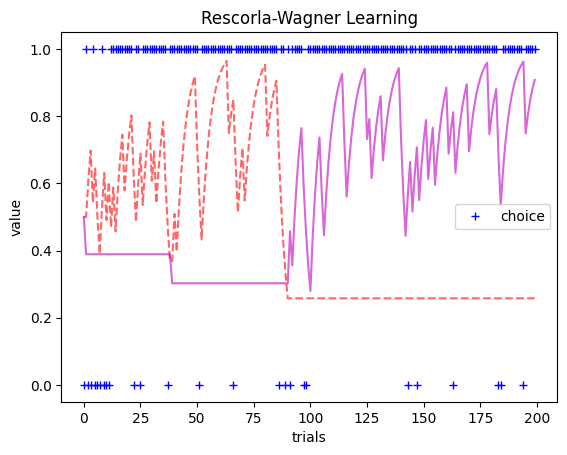

In [91]:



# simulate data
PARAMS = [ALPHA, 4]
PARAMS = [0.3, 4]
PARAMS = [0.2, 4]
PARAMS = [ALPHA, BETA]



Q_hat, action_pred = simulate_action_space(params=PARAMS, reward_vector=srw.r, Q_init=[0.5, 0.5])
print('Q_hat (init) ', Q_hat[:,0])

ax = RescorlaWagnerPlots.plot_Q_values(srw.c, srw.r, Q_hat.T)
plt.show();

RescorlaWagnerPlots.plot_Q_estimates(Q_hat, srw.c)

[0.2, 4]


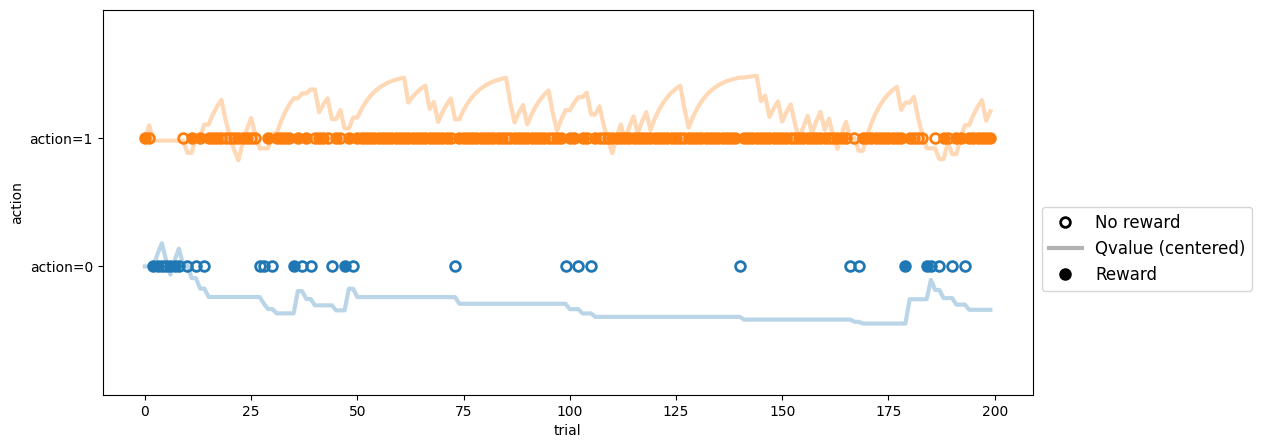

<module 'matplotlib.pyplot' from '/Users/zachwolpe/miniforge3/envs/mlxgo/lib/python3.12/site-packages/matplotlib/pyplot.py'>

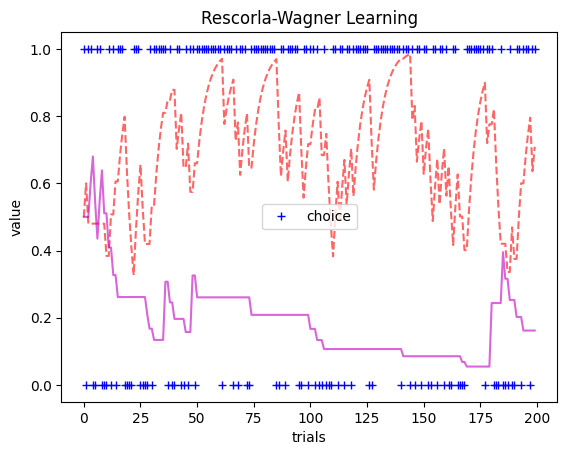

In [34]:
print(params)

ax = RescorlaWagnerPlots.plot_Q_values(srw.c, srw.r, srw.Q_stored.T)
plt.show();

RescorlaWagnerPlots.plot_Q_estimates(srw.Q_stored, srw.r)

In [87]:

import plotly.express as px
fig = px.scatter_3d( x=_alphas, y=_thetas, z=MSE_results,
              color=MSE_results)
fig.show()

In [ ]:

from scipy.optimize import minimize


def minimize_scikit(actions, init_guess, Q_init=[0.5,0.5], alpha_bound=(0, 1), theta_bound=(1, 50),):
    bounds=(alpha_bound, theta_bound)
    result = minimize(
                    fun=loss_function,
                    x0=init_guess,
                    args=(actions, Q_init), #  other params
                    bounds=bounds
                    )
    return result



In [ ]:
actions = srw.c
minimize_scikit(actions, init_guess=[0,0])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.44
        x: [ 1.438e-07  1.000e+00]
      nit: 1
      jac: [ 1.000e+06  5.000e+06]
     nfev: 63
     njev: 21
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [ ]:



def minimize_bute_force(
        actions,
        Q_init=[0.5,0.5],
        alpha_range=np.linspace(0,1,10),
        theta_range=np.linspace(1,15,10),
        ):


        min_mse = np.inf
        parameter_estimates = (None, None)
        Q_hat = None

        T = len(actions)
        for _alpha in alpha_range:
            for _theta in theta_range:
                _mse = loss_function([_alpha, _theta], actions, Q_init=Q_init)
                # print(f'alpha: {round(_alpha, 2)}, theta: {round(_theta, 2)}, mse: {mse}')
                if _mse <= min_mse:
                    min_mse = _mse
                    parameter_estimates = (_alpha, _theta)
                    # Q_hat = _Q_hat
                    # print('-> new parameter estimate!')

        return min_mse, parameter_estimates
    

In [ ]:
params = [0.2,4]

reward_vector = srw.r
Q_hat, action_pred = simulate_action_space(params, reward_vector)
# Q_hat, action_pred

In [ ]:
alpha_true_range = np.linspace(0,1,10)
theta_true_range = np.linspace(1,10,10)


results = {'alpha (true)':[], 'alpha (pred)':[], 'theta (true)':[], 'theta (pred)':[]}

res_nll = np.inf

from tqdm import tqdm
for alpha in tqdm(alpha_true_range):
    for theta in theta_true_range:
        params = (alpha, theta)

# for params in zip(alpha_true_range, theta_true_range):

        # generate data
        srw = RescorlaWagnerSimulate()
        srw.simulate(params, T=100, mu=[0.2, 0.8], noisy_choice=True)

        # fit parameters
        # params = [a,b]

        # reward_vector = srw.r
        # simulate_action_space()


        action_true = srw.c
        # min_mse, param_fits = minimize_bute_force(action_true)
        for alpha_INIT in alpha_true_range:
            for theta_INIT in theta_true_range:
                result = minimize_scikit(action_true, init_guess=[alpha_INIT, theta_INIT])
                if result.fun < res_nll:
                    res_nll = result.fun
                    param_fits = result.x
     
        

        


        # fit parametes
        # param_fits, BIC = RoscorlaWagner.fit_rescorla_wagner_model_n_times(
        #     action_vector=srw.c,
        #     reward_vector=srw.r,
        #     alpha_range=np.linspace(0,1,10),
        #     theta_range=np.linspace(1,15,10),
        #     alpha_bound=(0,1),
        #     theta_bound=(1,25))

        # store results
        results['alpha (true)'].append(params[0])
        results['alpha (pred)'].append(param_fits[0])
        results['theta (true)'].append(params[1])
        results['theta (pred)'].append(param_fits[1])
       
        
    

100%|██████████| 10/10 [05:29<00:00, 32.98s/it]


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

_results = pd.DataFrame(results)
print(_results.shape)
_results.head()

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=_results['alpha (true)'], y=_results['alpha (pred)'], mode='markers', name='alpha'),
    row=1, col=1
)

# add linear line
_x = np.linspace(0,1,100)
_y = _x
fig.add_trace(go.Scatter(x=_x, y=_y, mode='lines', marker_color='black', name='y=x', showlegend=False),row=1, col=1)

fig.add_trace(
    go.Scatter(x=_results['theta (true)'], y=_results['theta (pred)'], mode='markers', name='theta'),
    row=1, col=2
)
# add linear line
_x = np.linspace(0,10,100)
_y = _x
fig.add_trace(go.Scatter(x=_x, y=_y, mode='lines', marker_color='black', name='y=x', showlegend=False),row=1, col=2)

fig.update_layout(height=600, width=800, title_text="Sensitivity Analysis: Parameter Stability Estimate", template='none')
fig.show()

(100, 4)


# Addtional Plot

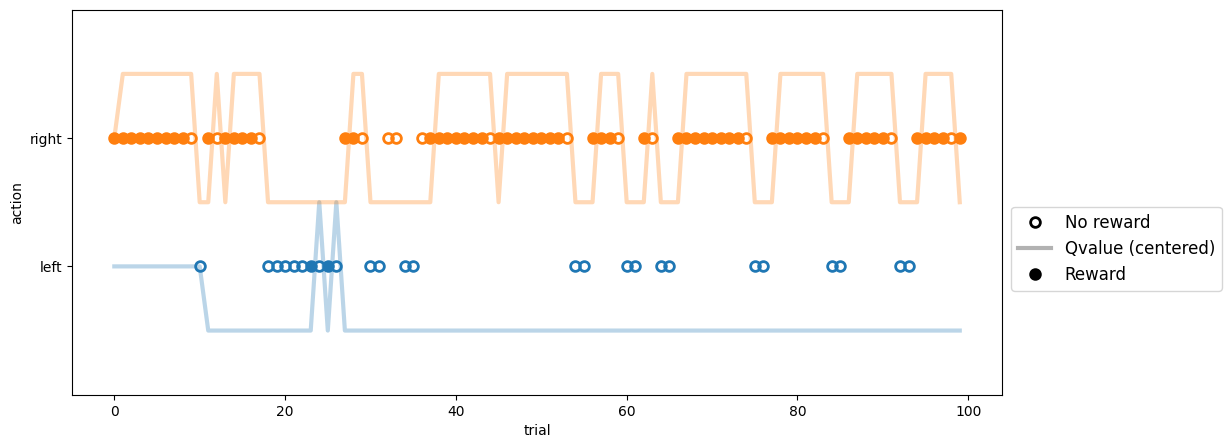

In [ ]:


ax = RescorlaWagnerPlots.plot_Q_values(srw.c, srw.r, srw.Q_stored.T)
ax;

array([[0.5, 0.5],
       [0.5, 1. ],
       [0.5, 1. ],
       [0.5, 1. ],
       [0.5, 1. ],
       [0.5, 1. ],
       [0.5, 1. ],
       [0.5, 1. ],
       [0.5, 1. ],
       [0.5, 1. ],
       [0.5, 0. ],
       [0. , 0. ],
       [0. , 1. ],
       [0. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [1. , 0. ],
       [0. , 0. ],
       [1. , 0. ],
       [0. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. ,